In [10]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the metrics data
with open('metrics.json', 'r') as f:
    metrics = json.load(f)

# Prepare data for plotting
data = []
for model_name, model_metrics in metrics.items():
    for metric, values in model_metrics.items():
        for epoch, value in enumerate(values):
            data.append({'Model': model_name.capitalize(), 'Metric': metric, 'Epoch': epoch, 'Value': value})

# Convert to DataFrame
df = pd.DataFrame(data)

print(df.head(n=10))
print('Metrics:', df['Metric'].unique())

      Model       Metric  Epoch     Value
0  Baseline  source_loss      0  2.244804
1  Baseline  source_loss      1  2.039124
2  Baseline  source_loss      2  1.723224
3  Baseline  source_loss      3  1.341381
4  Baseline  source_loss      4  1.020985
5  Baseline  source_loss      5  0.812762
6  Baseline  source_loss      6  0.622949
7  Baseline  source_loss      7  0.492998
8  Baseline  source_loss      8  0.399434
9  Baseline  source_loss      9  0.330058
Metrics: ['source_loss' 'source_acc' 'target_loss' 'target_acc' 'total_loss'
 'total_cls_loss' 'total_coral_loss' 'total_loss_d' 'total_loss_g'
 'total_cls_loss_g' 'total_gen_loss_g']


In [2]:
# Calculate the maximum accuracies for each model in source and target
max_accuracies = df[df['Metric'].isin(['source_acc', 'target_acc', 'source_loss', 'target_loss'])] \
    .groupby(['Model', 'Metric'])['Value'] \
    .max() \
    .unstack()

# Sort by highest target accuracy first
max_accuracies = max_accuracies.sort_values(by='target_acc', ascending=False)

# Display the table of maximum source and target accuracies
print(max_accuracies)

Metric       source_acc  source_loss  target_acc  target_loss
Model                                                        
Adverserial         1.0     2.158945       1.000     2.220494
Coral               1.0     2.266359       0.845     2.277816
Adabn               1.0     0.000763       0.840     0.328694
Baseline            1.0     2.244804       0.800     2.262195


In [3]:
# We only have one sample for Adabn
df = df[df["Model"] != "Adabn"]

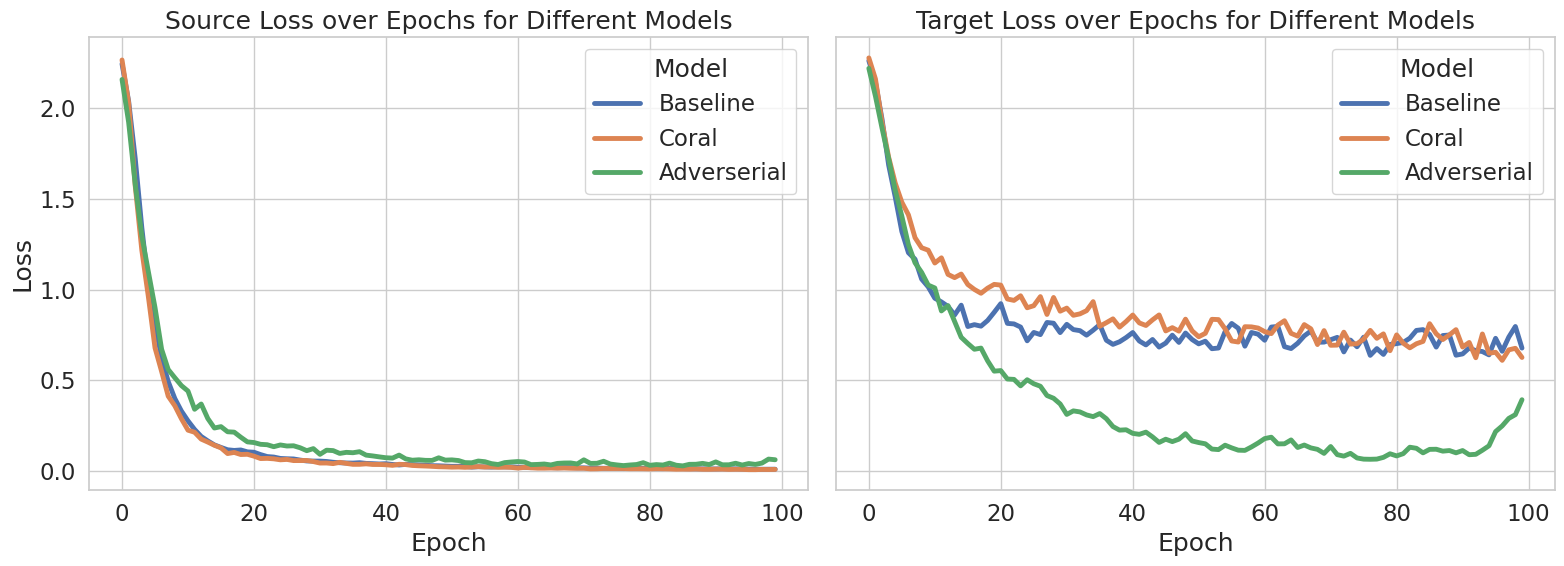

In [4]:
# Set seaborn style for plots
sns.set(style="whitegrid", font_scale=1.5)

# Create subplots: one for source loss, one for target loss
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plotting Source Loss for each model
sns.lineplot(data=df[df['Metric'] == 'source_loss'],
             x='Epoch', y='Value', hue='Model', markers=True, ax=axes[0], linewidth=3.5)
axes[0].set_title("Source Loss over Epochs for Different Models")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend(title="Model")

# Plotting Target Loss for each model
sns.lineplot(data=df[df['Metric'] == 'target_loss'],
             x='Epoch', y='Value', hue='Model', markers=True, ax=axes[1], linewidth=3.5)
axes[1].set_title("Target Loss over Epochs for Different Models")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend(title="Model")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

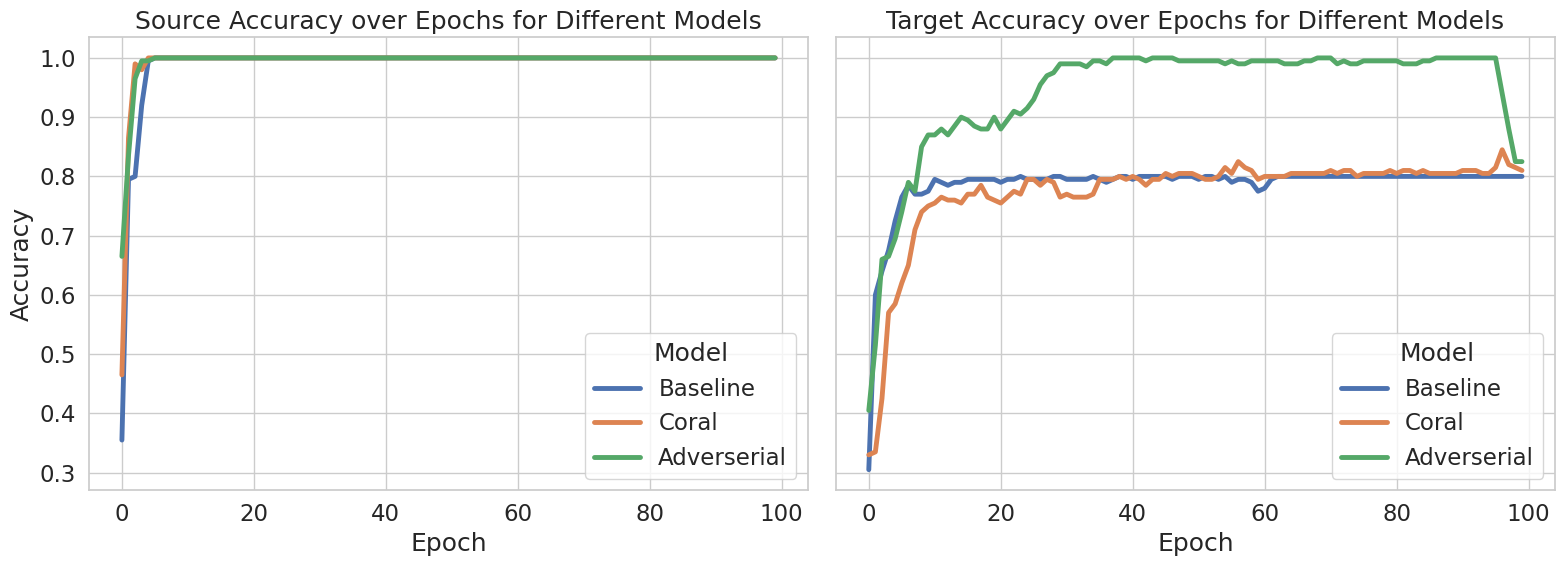

In [5]:
# Create subplots: one for source accuracy, one for target accuracy
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plotting Source Accuracy for each model with thicker lines
sns.lineplot(data=df[df['Metric'] == 'source_acc'],
             x='Epoch', y='Value', hue='Model', markers=True, ax=axes[0], linewidth=3.5)
axes[0].set_title("Source Accuracy over Epochs for Different Models")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend(title="Model")

# Plotting Target Accuracy for each model with thicker lines
sns.lineplot(data=df[df['Metric'] == 'target_acc'],
             x='Epoch', y='Value', hue='Model', markers=True, ax=axes[1], linewidth=3.5)
axes[1].set_title("Target Accuracy over Epochs for Different Models")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].legend(title="Model")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()